<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20KNN-RNN%20for%204%20class%20classifications%20based%20on%20WSNBFSF%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid KNN-RNN for 4 class classifications based on WSNBFSF dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
dataset = pd.read_csv("dataset.csv")

# Check for missing values
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

### **Data Preprocessing**

In [4]:
from keras.utils import np_utils
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=4)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(312106, 17)
(312106, 4)


In [5]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Hybrid KNN-RNN for 4 Class**

In [7]:
# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [8]:
# RNN model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10)

# Predictions from K-NN model
y_pred_knn = knn.predict(X_test)

# Predictions from RNN model
y_pred_rnn = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = np.argmax(y_pred_rnn, axis=1)

Epoch 1/10
26286/26286 [==============================] - 230s 9ms/step - loss: 1.6489 - accuracy: 0.8519
Epoch 2/10
26286/26286 [==============================] - 228s 9ms/step - loss: 1.0528 - accuracy: 0.6230
Epoch 3/10
26286/26286 [==============================] - 225s 9ms/step - loss: 2.9595 - accuracy: 0.5163
Epoch 4/10
26286/26286 [==============================] - 234s 9ms/step - loss: 1.5158 - accuracy: 0.4537
Epoch 5/10
26286/26286 [==============================] - 229s 9ms/step - loss: 1.3608 - accuracy: 0.4392
Epoch 6/10
26286/26286 [==============================] - 222s 8ms/step - loss: 0.9743 - accuracy: 0.5611
Epoch 7/10
26286/26286 [==============================] - 225s 9ms/step - loss: 1.0329 - accuracy: 0.5259
Epoch 8/10
26286/26286 [==============================] - 227s 9ms/step - loss: 0.8064 - accuracy: 0.6429
Epoch 9/10
26286/26286 [==============================] - 224s 9ms/step - loss: 1.4341 - accuracy: 0.5177
Epoch 10/10
6572/6572 [=======================

In [10]:
# Combine predictions from K-NN and RNN models
y_pred = (y_pred_knn + to_categorical(y_pred_rnn, num_classes=4)) // 2

# Evaluation metrics
print("Combined Model:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Combined Model:
              precision    recall  f1-score   support

           0       0.46      0.98      0.63     52500
           1       0.97      0.21      0.35     52554
           2       0.98      0.65      0.78     52545
           3       1.00      1.00      1.00     52682

    accuracy                           0.71    210281
   macro avg       0.86      0.71      0.69    210281
weighted avg       0.86      0.71      0.69    210281

[[51672   295   533     0]
 [41335 11194     0    25]
 [18393     0 34127    25]
 [  216     0     0 52466]]


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid KNN-RNN Model


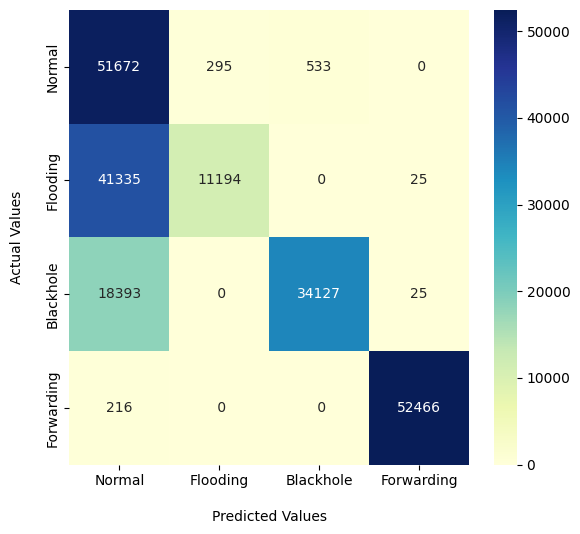

In [12]:
print("Confusion Matrix of Hybrid KNN-RNN Model") 
conf_mat(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

In [13]:
report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), output_dict=True)
detection_rates = {}
for cls in range(4):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.9842285714285715, 1: 0.2129999619439053, 2: 0.6494813968978971, 3: 0.9958999278691014}
